# Benchmark for Maxwell-Faraday Equations


Constituitive equation: $dE = -\partial_tB$

Other equations/parameters:

$
e_0 * E = D \\
u_0 * H = B \\
c = \frac{1}{\sqrt{m_0 * e_0}}
$

where,

    - E = electric field (1-form)
    - B = magnetic field (2-form)
    - $u_0$ =
    - $e_0$ =
    - c = speed of light
    


In [2]:
using CombinatorialSpaces, DifferentialEquations, CairoMakie
using MeshIO
using CombinatorialSpaces.DiscreteExteriorCalculus: inv_hodge_star
using CombinatorialSpaces.SimplicialSets: d

# dual subdivision 
function dual(s::EmbeddedDeltaSet1D{O, P}) where {O, P}
  sd = EmbeddedDeltaDualComplex1D{O, eltype(P), P}(s)
  subdivide_duals!(sd, Circumcenter())
  sd
end

dual (generic function with 2 methods)

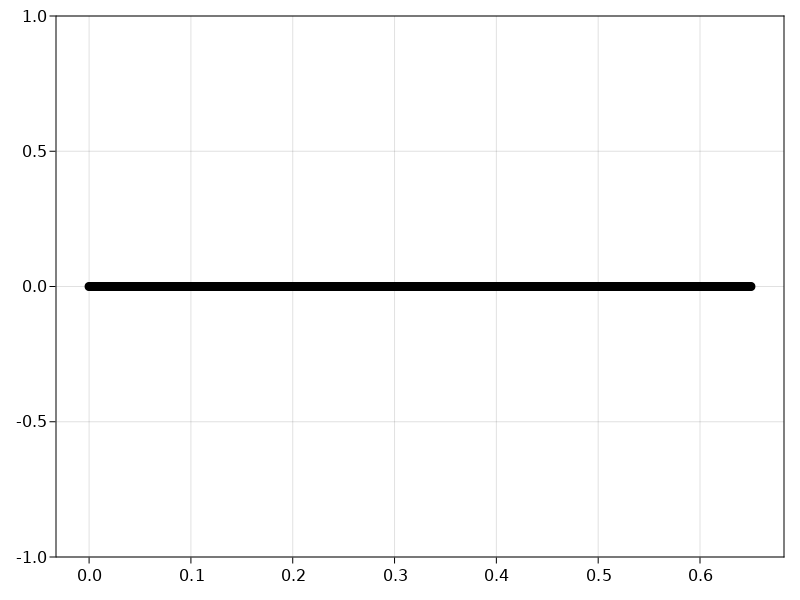

In [4]:
# Define mesh
s2D = EmbeddedDeltaSet2D("meshes/truss.obj")
s = EmbeddedDeltaSet1D{Bool, eltype(s2D[:point])}()

add_vertices!(s, 650, point=[eltype(s2D[:point])(i,0.0,0.0) for i in range(0, 0.650, length=650)])
add_edges!(s, [i for i in 1:(nv(s)-1)], [i+1 for i in 1:(nv(s)-1)], edge_orientation=true)
orient!(s) # for laplacian

sd = dual(s)

# Define vertices for BC application (fixed-fixed)
left = 1
right = nv(s)

# Plot mesh
x_loc = [p[1] for p in s[:point]]
y_loc = [p[2] for p in s[:point]]
plot(x_loc, y_loc,
     legend=:none, seriestype = :scatter,
     ylims=[minimum(y_loc),0],
     xlims=[minimum(x_loc),maximum(x_loc)])

## Add the physics

In [ ]:
E = VForm(zeros(nv(s)))

u0 = vcat(E.data) # initial condition

vf(du, u, p, t) = begin
    du .= -1 * d(E) 
end

